In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Periodos


Los periodos representan lapsos de tiempo, como días, meses, trimestres o años. La clase **pandas.Period** representa este tipo de datos, y requiere una cadena de texto o un entero y una frecuencia.

In [3]:
p = pd.Period('2023', freq ='A-DEC')

In [4]:
p

Period('2023', 'A-DEC')

En este caso, el objeto Period representa el lapso de tiempo completo desde el 1 de enero de 2023 hasta el 31 de diciembre de 2023.

In [5]:
p+4

Period('2027', 'A-DEC')

Se pueden construir rangos regulares de periodos con la función period_range:

In [6]:
periods = pd.period_range('2024-01-01', '2024-06-30', freq='M')

In [7]:
periods

PeriodIndex(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06'], dtype='period[M]')

Los objetos DataFrame indexados por series temporales pueden convertirse a periodos con el método to_period:


In [8]:
precio_c = pd.read_csv('https://raw.githubusercontent.com/jamc88/TSMCI-Analisis-de-datos-con-Python/main/Datos/WALMEX.csv',
                usecols=['Date','Close'],
                index_col=0, parse_dates=True)

In [9]:
precio_c

,Close
Date,
2022-07-01,70.23
2022-07-04,69.79
2022-07-05,69.66
2022-07-06,68.83
2022-07-07,68.90
...,...
2023-06-26,68.37
2023-06-27,69.79
2023-06-28,68.50


In [12]:
p = precio_c.to_period('M')
p

,Close
Date,
2022-07,70.23
2022-07,69.79
2022-07,69.66
2022-07,68.83
2022-07,68.90
...,...
2023-06,68.37
2023-06,69.79
2023-06,68.50


Para volver a convertir a marcas temporales, usamos el método to_timestamp, que devuelve un objeto DatetimeIndex:

In [13]:
p.to_timestamp(how='start')

,Close
Date,
2022-07-01,70.23
2022-07-01,69.79
2022-07-01,69.66
2022-07-01,68.83
2022-07-01,68.90
...,...
2023-06-01,68.37
2023-06-01,69.79
2023-06-01,68.50


Podemos obtener agregaciones por el método **resample**:

In [16]:
precio_c.resample('M', kind='period').mean()

,Close
Date,
2022-07,71.122857
2022-08,70.474348
2022-09,72.781429
2022-10,73.400476
2022-11,74.370500
2022-12,71.343810
2023-01,72.915909
2023-02,71.636316
2023-03,72.704545


In [17]:
precio_c.resample('Q-DEC', kind='period').mean()

,Close
Date,
2022Q3,71.429231
2022Q4,73.016774
2023Q1,72.456190
2023Q2,70.287581


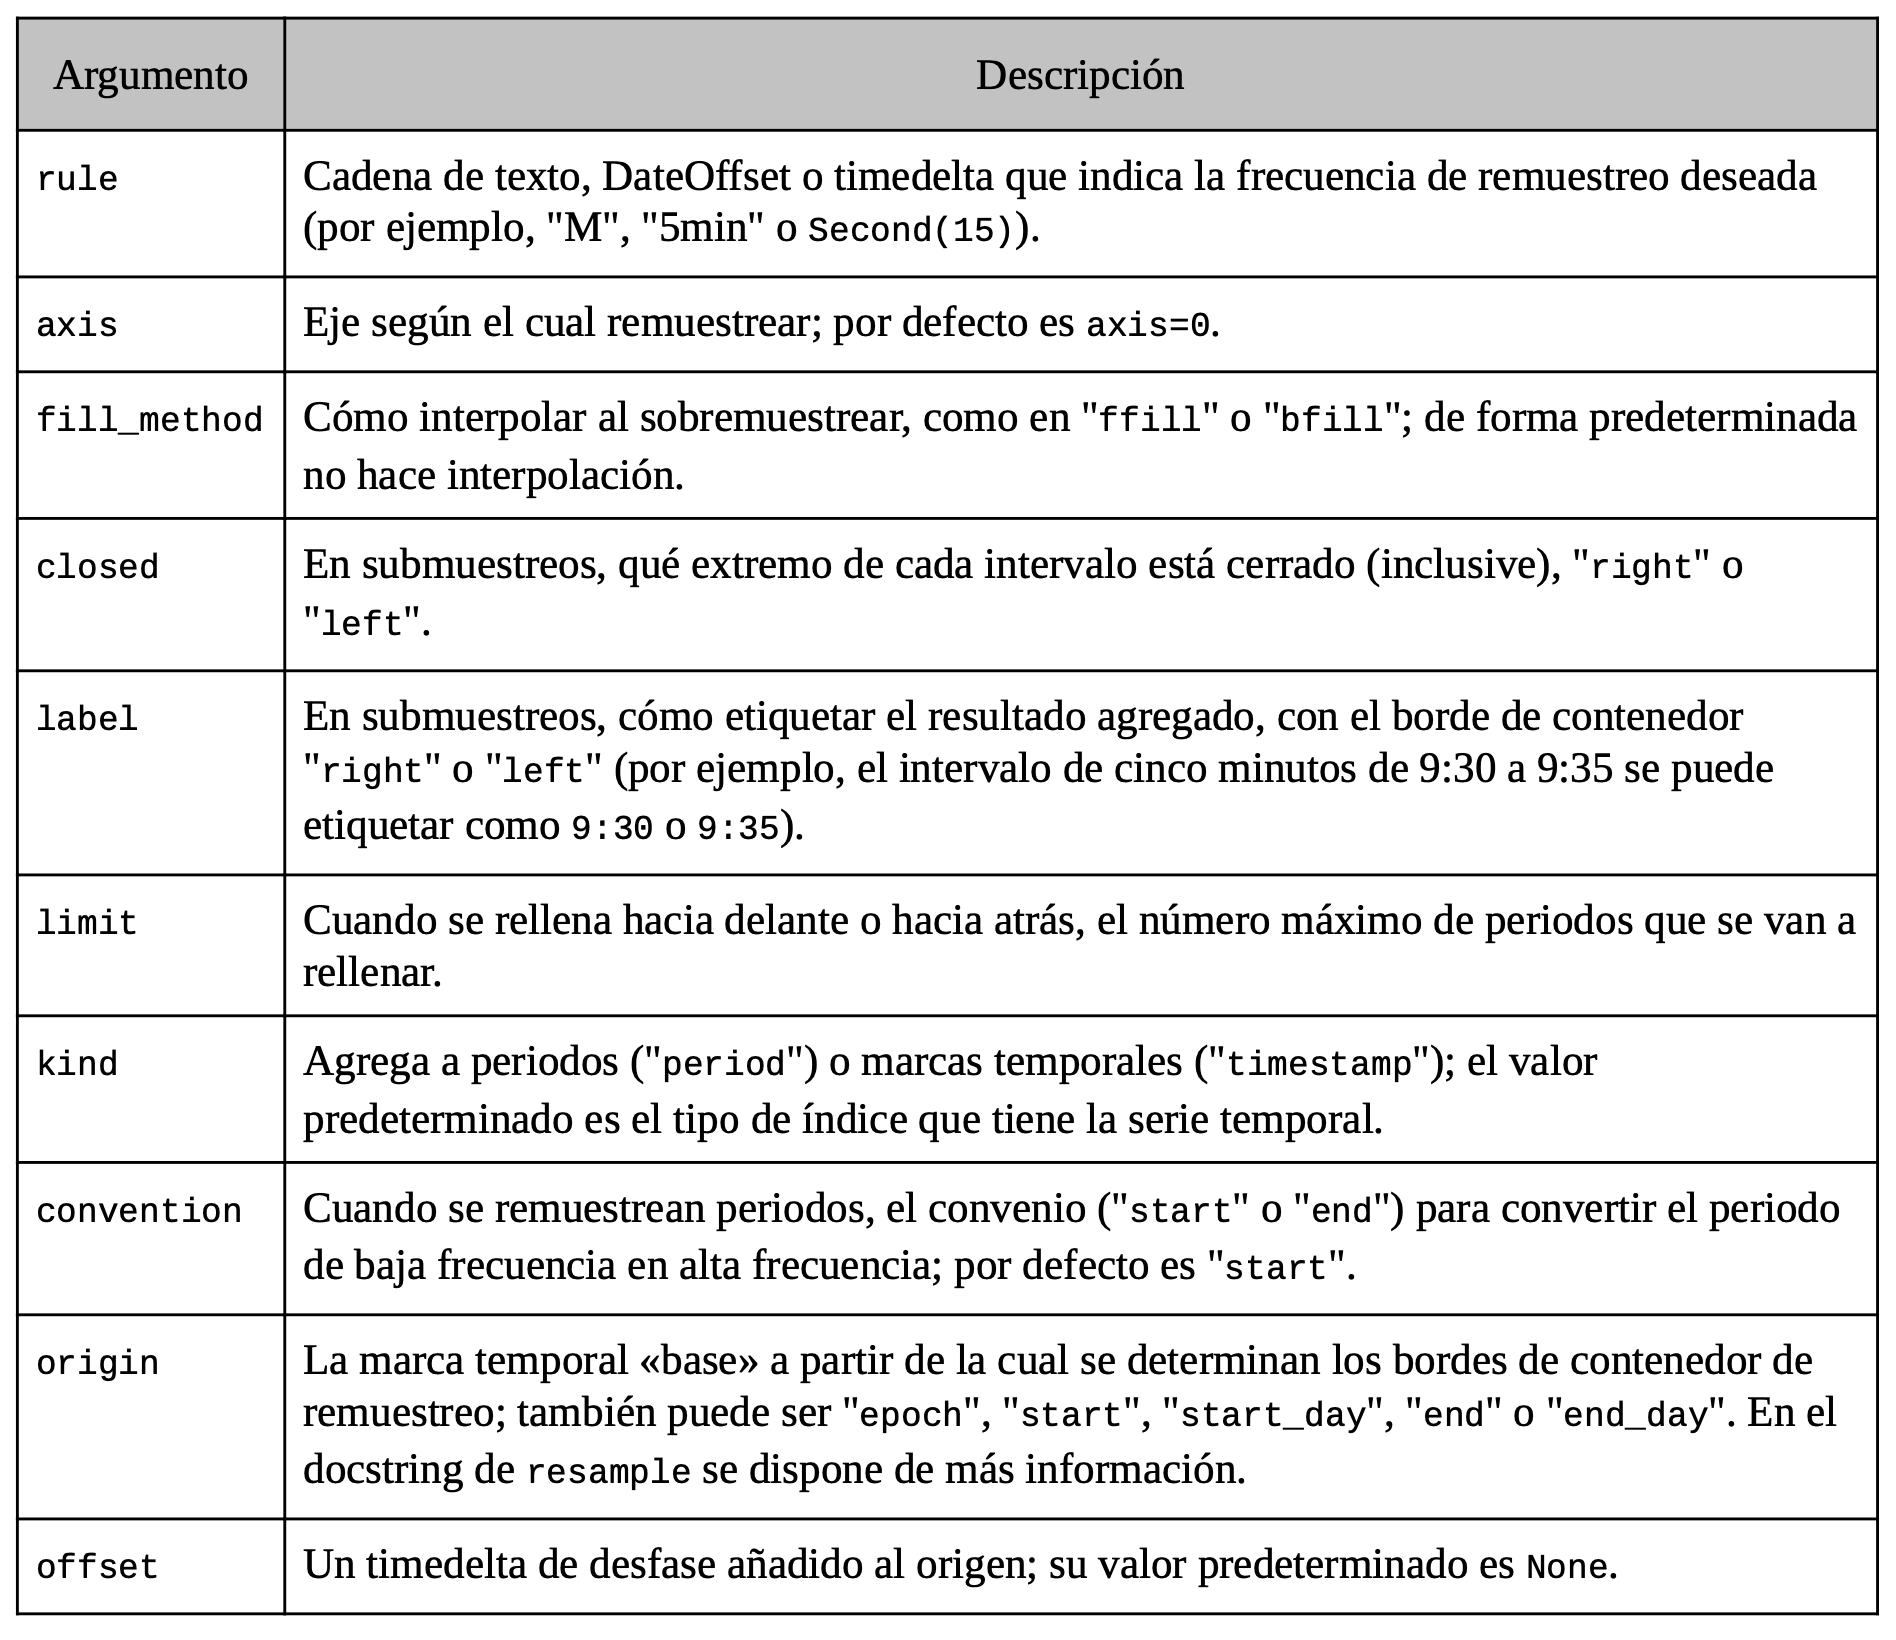

Los datos trimestrales son estándares en contabilidad, finanzas y otros campos. Gran parte de estos datos se comunican en relación a un cierre de año fiscal, normalmente el último día natural o laborable de uno de los 12 meses del año.

In [18]:
deuda = pd.read_csv('https://raw.githubusercontent.com/jamc88/TSMCI-Analisis-de-datos-con-Python/main/Datos/deuda_2022.csv')

In [19]:
deuda = deuda.drop(669)
deuda

,anio,trimestre,mes,no_registro,tipo_deuda,detalle_tipo_deuda,acreedor,concepto,inicio_credito,fin_credito,...,disposicion_inicial_credito,colocacion_periodo,amortizaciones_periodo,intereses_periodo,pago_servicio_deuda,saldo_periodo,endeudamiento_periodo,tasa,sobretasa,tasa_final
0,2018.0,4.0,Diciembre,145/2010,Largo Plazo,Mercado de Capitales,CI BANCO,BONO GDFCB 10-2,25/06/10,12/06/20,...,2.520951e+09,0,0,2.013680e+08,2.013680e+08,2.520951e+09,0.000000e+00,7.9,NaN,7.9
1,2018.0,4.0,Diciembre,224/2007,Largo Plazo,Banca Comercial,BANCOMER,"BANCOMER 3,457",30/08/07,27/07/37,...,3.457974e+09,0,14809395.11,2.860966e+08,3.009060e+08,3.389146e+09,-1.480940e+07,TIIE,0.35,TIIE+0.35
2,2018.0,4.0,Diciembre,225/2007,Largo Plazo,Banca Comercial,BANCOMER,BANCOMER 7000,31/08/07,27/08/40,...,7.000000e+09,0,108919450.9,5.809492e+08,6.898686e+08,6.371209e+09,-1.089195e+08,8.91,NaN,8.91
3,2018.0,4.0,Diciembre,226/2007,Largo Plazo,Banca Comercial,BANCOMER,"BANCOMER 4,700",31/08/07,27/07/37,...,4.700000e+09,0,20128593.44,4.018697e+08,4.219983e+08,4.606450e+09,-2.012859e+07,8.8,NaN,8.8
4,2018.0,4.0,Diciembre,513/2008,Largo Plazo,Banca de Desarrollo,BANOBRAS,"BANOBRAS 1,914",26/12/08,25/10/19,...,1.914681e+09,0,320373500.5,2.445093e+07,3.448244e+08,1.277433e+08,-3.203735e+08,TIIE,0.97,TIIE+0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,2022.0,2.0,Junio,P09-1113146,Largo Plazo,Mercado de Capitales,EVERCORE,BONO GDFECB 13,1385596800,1700092800,...,2.126875e+09,0,0,7.580537e+07,7.580537e+07,2.126875e+09,0.000000e+00,7.05,NaN,7.05
665,2022.0,2.0,Junio,P09-1014157,Largo Plazo,Mercado de Capitales,EVERCORE,BONO GDFECB 14,1414972800,1729468800,...,2.500000e+09,0,0,8.114167e+07,8.114167e+07,2.500000e+09,0.000000e+00,6.42,NaN,6.42
666,2022.0,2.0,Junio,P09-0915121,Largo Plazo,Mercado de Capitales,EVERCORE,BONO GDFECB 15-2,1443139200,1757635200,...,2.500000e+09,0,0,0.000000e+00,0.000000e+00,2.500000e+09,0.000000e+00,6.7,NaN,6.7
667,2022.0,2.0,Junio,P09-0917056,Largo Plazo,Mercado de Capitales,EVERCORE,BONO GCDMXCB 17X,1505779200,1.84E+09,...,2.000000e+09,0,0,0.000000e+00,0.000000e+00,2.000000e+09,0.000000e+00,7.6,NaN,7.6


Convenios de frecuencia trimestral.

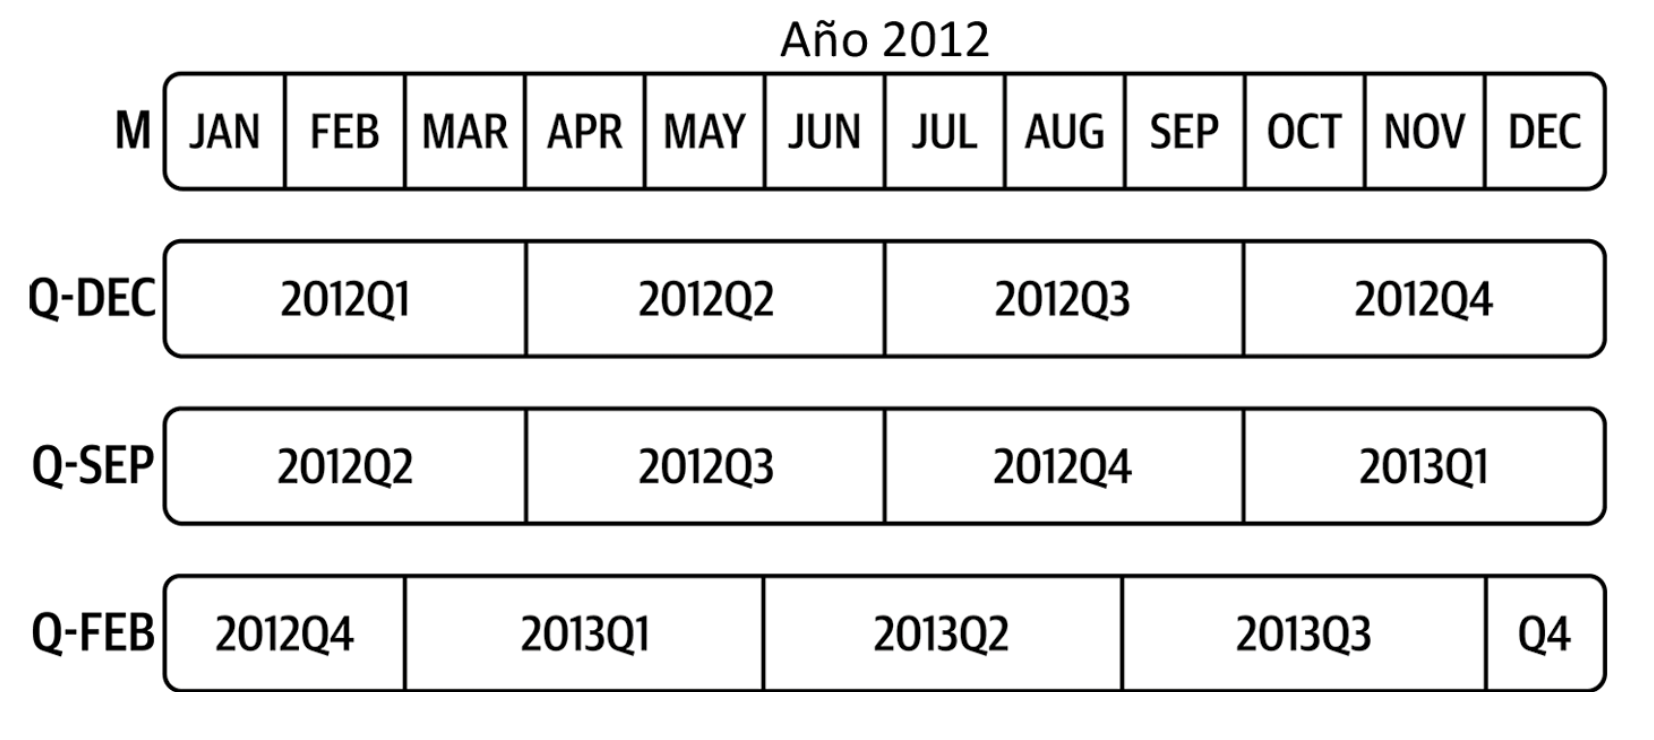

In [21]:
index = pd.PeriodIndex(year = deuda['anio'],
                       quarter = deuda['trimestre'],
                       freq = 'Q-DEC')

In [22]:
index

PeriodIndex(['2018Q4', '2018Q4', '2018Q4', '2018Q4', '2018Q4', '2018Q4',
             '2018Q4', '2018Q4', '2018Q4', '2018Q4',
             ...
             '2022Q2', '2022Q2', '2022Q2', '2022Q2', '2022Q2', '2022Q2',
             '2022Q2', '2022Q2', '2022Q2', '2022Q2'],
            dtype='period[Q-DEC]', length=669)

In [23]:
deuda.index = index

In [24]:
deuda

,anio,trimestre,mes,no_registro,tipo_deuda,detalle_tipo_deuda,acreedor,concepto,inicio_credito,fin_credito,...,disposicion_inicial_credito,colocacion_periodo,amortizaciones_periodo,intereses_periodo,pago_servicio_deuda,saldo_periodo,endeudamiento_periodo,tasa,sobretasa,tasa_final
2018Q4,2018.0,4.0,Diciembre,145/2010,Largo Plazo,Mercado de Capitales,CI BANCO,BONO GDFCB 10-2,25/06/10,12/06/20,...,2.520951e+09,0,0,2.013680e+08,2.013680e+08,2.520951e+09,0.000000e+00,7.9,NaN,7.9
2018Q4,2018.0,4.0,Diciembre,224/2007,Largo Plazo,Banca Comercial,BANCOMER,"BANCOMER 3,457",30/08/07,27/07/37,...,3.457974e+09,0,14809395.11,2.860966e+08,3.009060e+08,3.389146e+09,-1.480940e+07,TIIE,0.35,TIIE+0.35
2018Q4,2018.0,4.0,Diciembre,225/2007,Largo Plazo,Banca Comercial,BANCOMER,BANCOMER 7000,31/08/07,27/08/40,...,7.000000e+09,0,108919450.9,5.809492e+08,6.898686e+08,6.371209e+09,-1.089195e+08,8.91,NaN,8.91
2018Q4,2018.0,4.0,Diciembre,226/2007,Largo Plazo,Banca Comercial,BANCOMER,"BANCOMER 4,700",31/08/07,27/07/37,...,4.700000e+09,0,20128593.44,4.018697e+08,4.219983e+08,4.606450e+09,-2.012859e+07,8.8,NaN,8.8
2018Q4,2018.0,4.0,Diciembre,513/2008,Largo Plazo,Banca de Desarrollo,BANOBRAS,"BANOBRAS 1,914",26/12/08,25/10/19,...,1.914681e+09,0,320373500.5,2.445093e+07,3.448244e+08,1.277433e+08,-3.203735e+08,TIIE,0.97,TIIE+0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022Q2,2022.0,2.0,Junio,P09-1113146,Largo Plazo,Mercado de Capitales,EVERCORE,BONO GDFECB 13,1385596800,1700092800,...,2.126875e+09,0,0,7.580537e+07,7.580537e+07,2.126875e+09,0.000000e+00,7.05,NaN,7.05
2022Q2,2022.0,2.0,Junio,P09-1014157,Largo Plazo,Mercado de Capitales,EVERCORE,BONO GDFECB 14,1414972800,1729468800,...,2.500000e+09,0,0,8.114167e+07,8.114167e+07,2.500000e+09,0.000000e+00,6.42,NaN,6.42
2022Q2,2022.0,2.0,Junio,P09-0915121,Largo Plazo,Mercado de Capitales,EVERCORE,BONO GDFECB 15-2,1443139200,1757635200,...,2.500000e+09,0,0,0.000000e+00,0.000000e+00,2.500000e+09,0.000000e+00,6.7,NaN,6.7
2022Q2,2022.0,2.0,Junio,P09-0917056,Largo Plazo,Mercado de Capitales,EVERCORE,BONO GCDMXCB 17X,1505779200,1.84E+09,...,2.000000e+09,0,0,0.000000e+00,0.000000e+00,2.000000e+09,0.000000e+00,7.6,NaN,7.6


In [25]:
grouped = deuda['endeudamiento_periodo'].groupby(level=0)

In [26]:
ET = pd.DataFrame(grouped.sum())
ET.columns =['endeudamiento_trimestral']
ET

,endeudamiento_trimestral
2018Q4,3.875690e+09
2019Q1,-9.037825e+08
2019Q2,-1.135751e+09
2019Q3,-1.602166e+09
2019Q4,5.500000e+09
2020Q1,-1.032208e+09
2020Q2,-3.615358e+09
2020Q3,-8.837700e+08
2020Q4,3.112107e+09
2021Q1,-1.563219e+09


# Funciones de ventana móvil

Los métodos de ventana móvil son formas de procesar datos en lotes más pequeños de una sola vez, normalmente para representar estadísticamente un conjunto de puntos agrupados.

Una clase importante de transformaciones de array empleadas para operaciones con series temporales son estadísticas y funciones evaluadas a lo largo de una ventana móvil. Esto puede resultar útil para suavizar datos con mucho ruido o muchos huecos.

In [28]:
close_all = pd.read_csv('https://raw.githubusercontent.com/jamc88/TSMCI-Analisis-de-datos-con-Python/main/Datos/AMX.csv', 
                        parse_dates=True, index_col=0)
#Precios de cierre: Apple, Microsoft, ExxonMobil

In [29]:
close = close_all[['AAPL','MSFT','XOM']]
close

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


remuestrearlos a una frecuencia de día laborable:

In [30]:
close = close.resample('B').ffill()

In [31]:
close

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


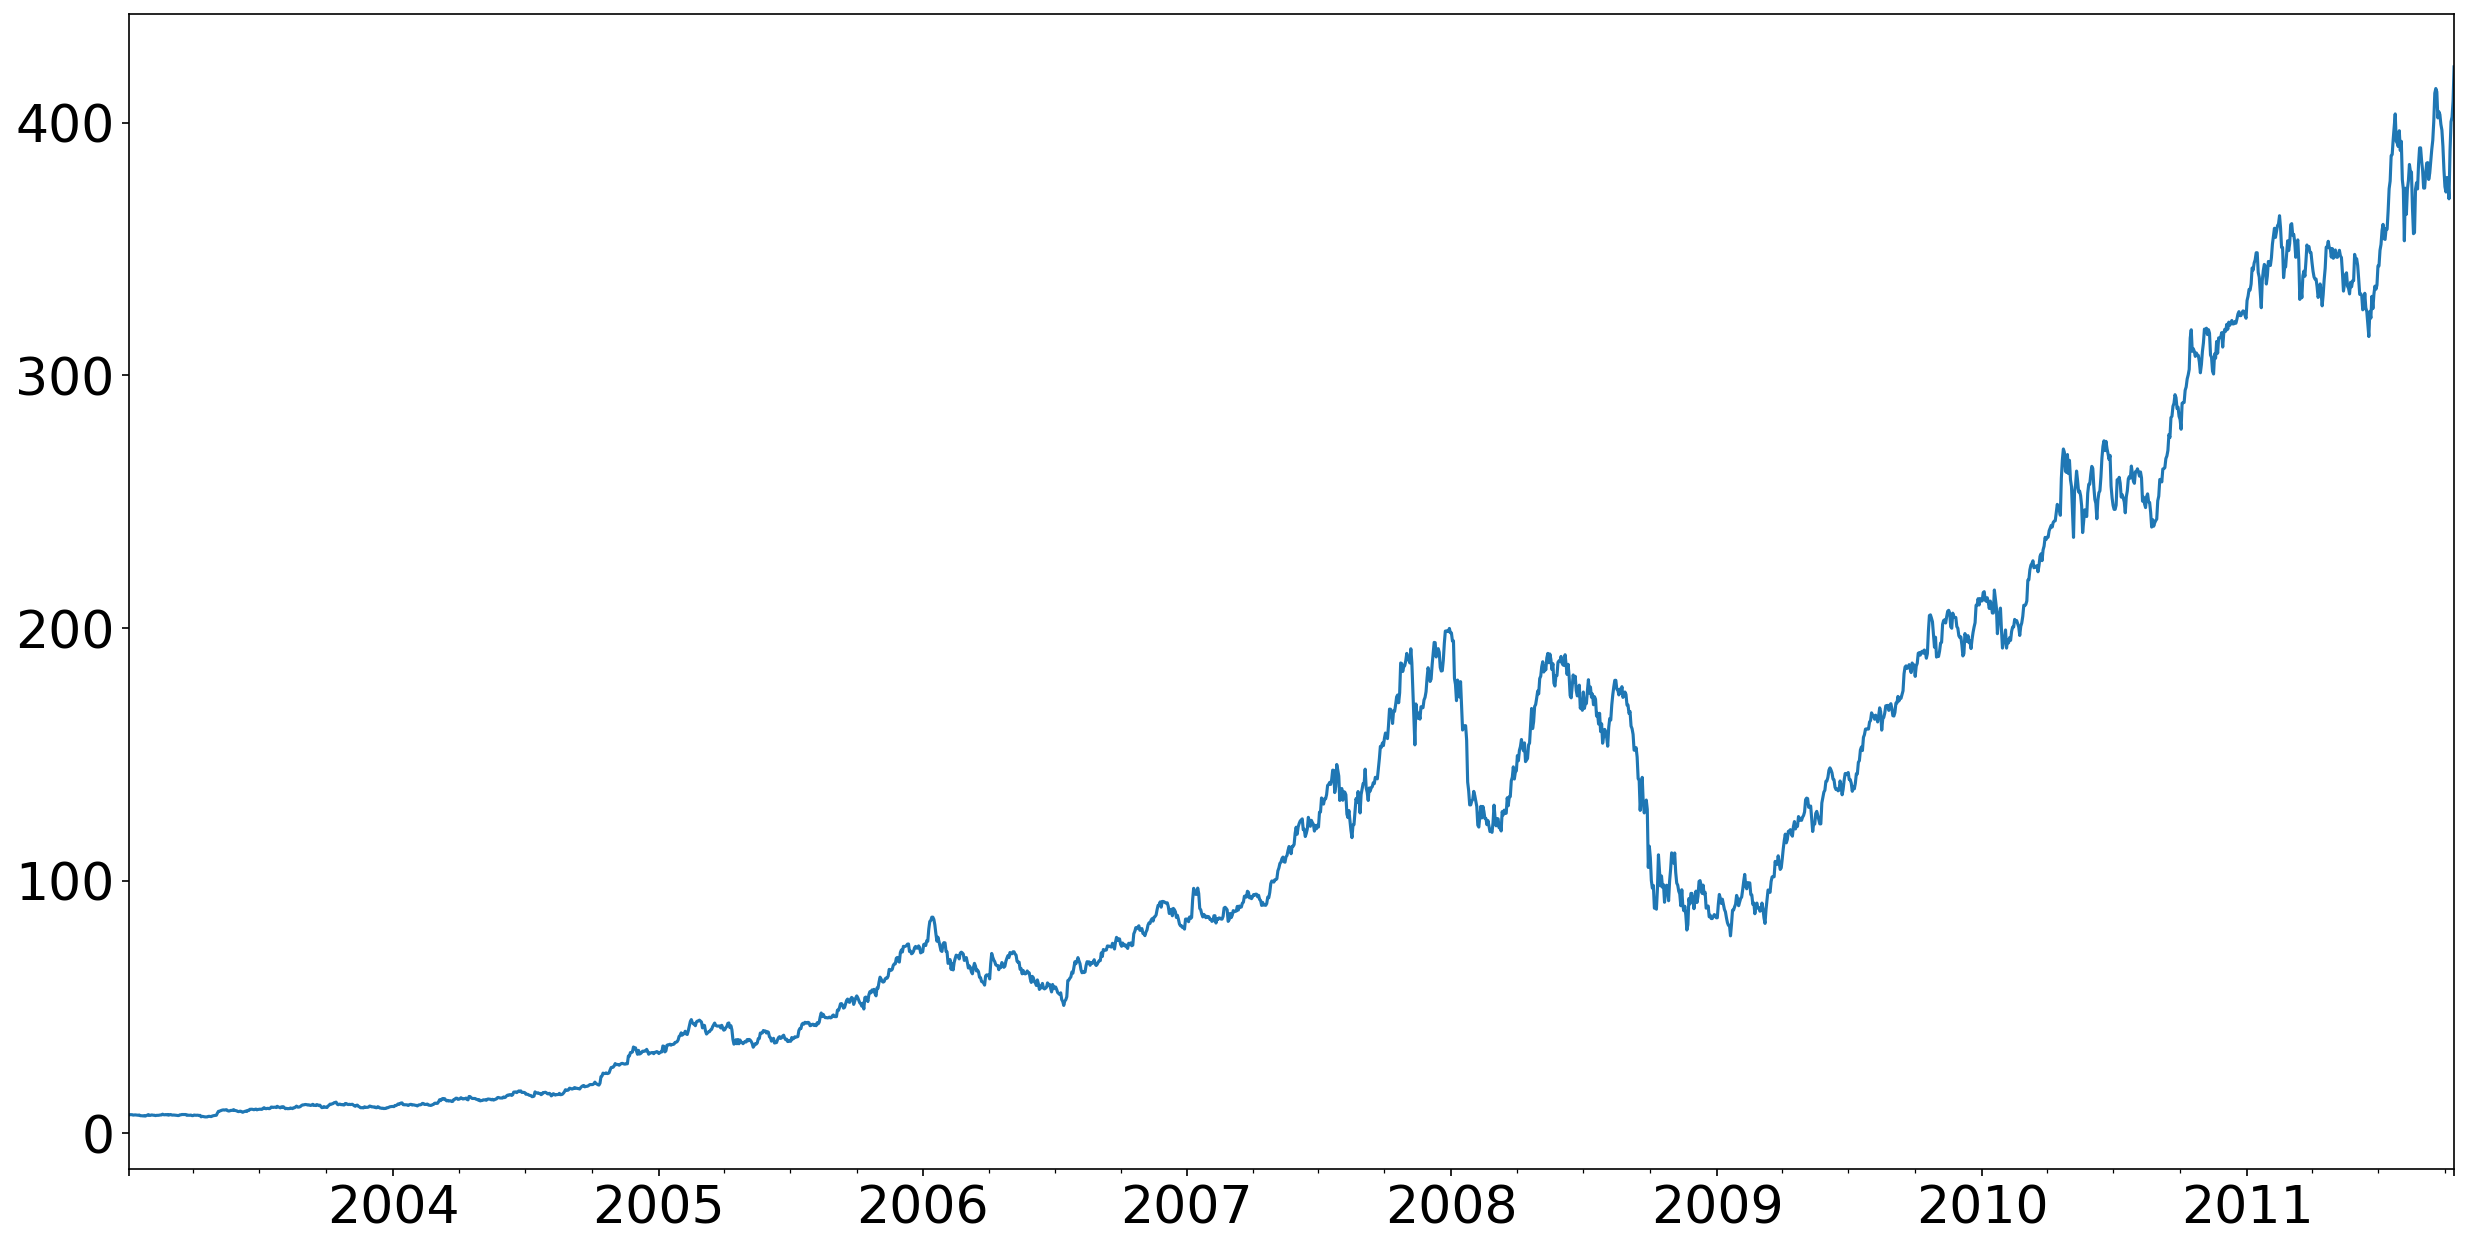

In [32]:
plt.figure(figsize=(20,10), dpi=150)
close['AAPL'].plot()
plt.tick_params(labelsize=25)

El operador **rolling** se comporta de forma similar a resample y groupby. 

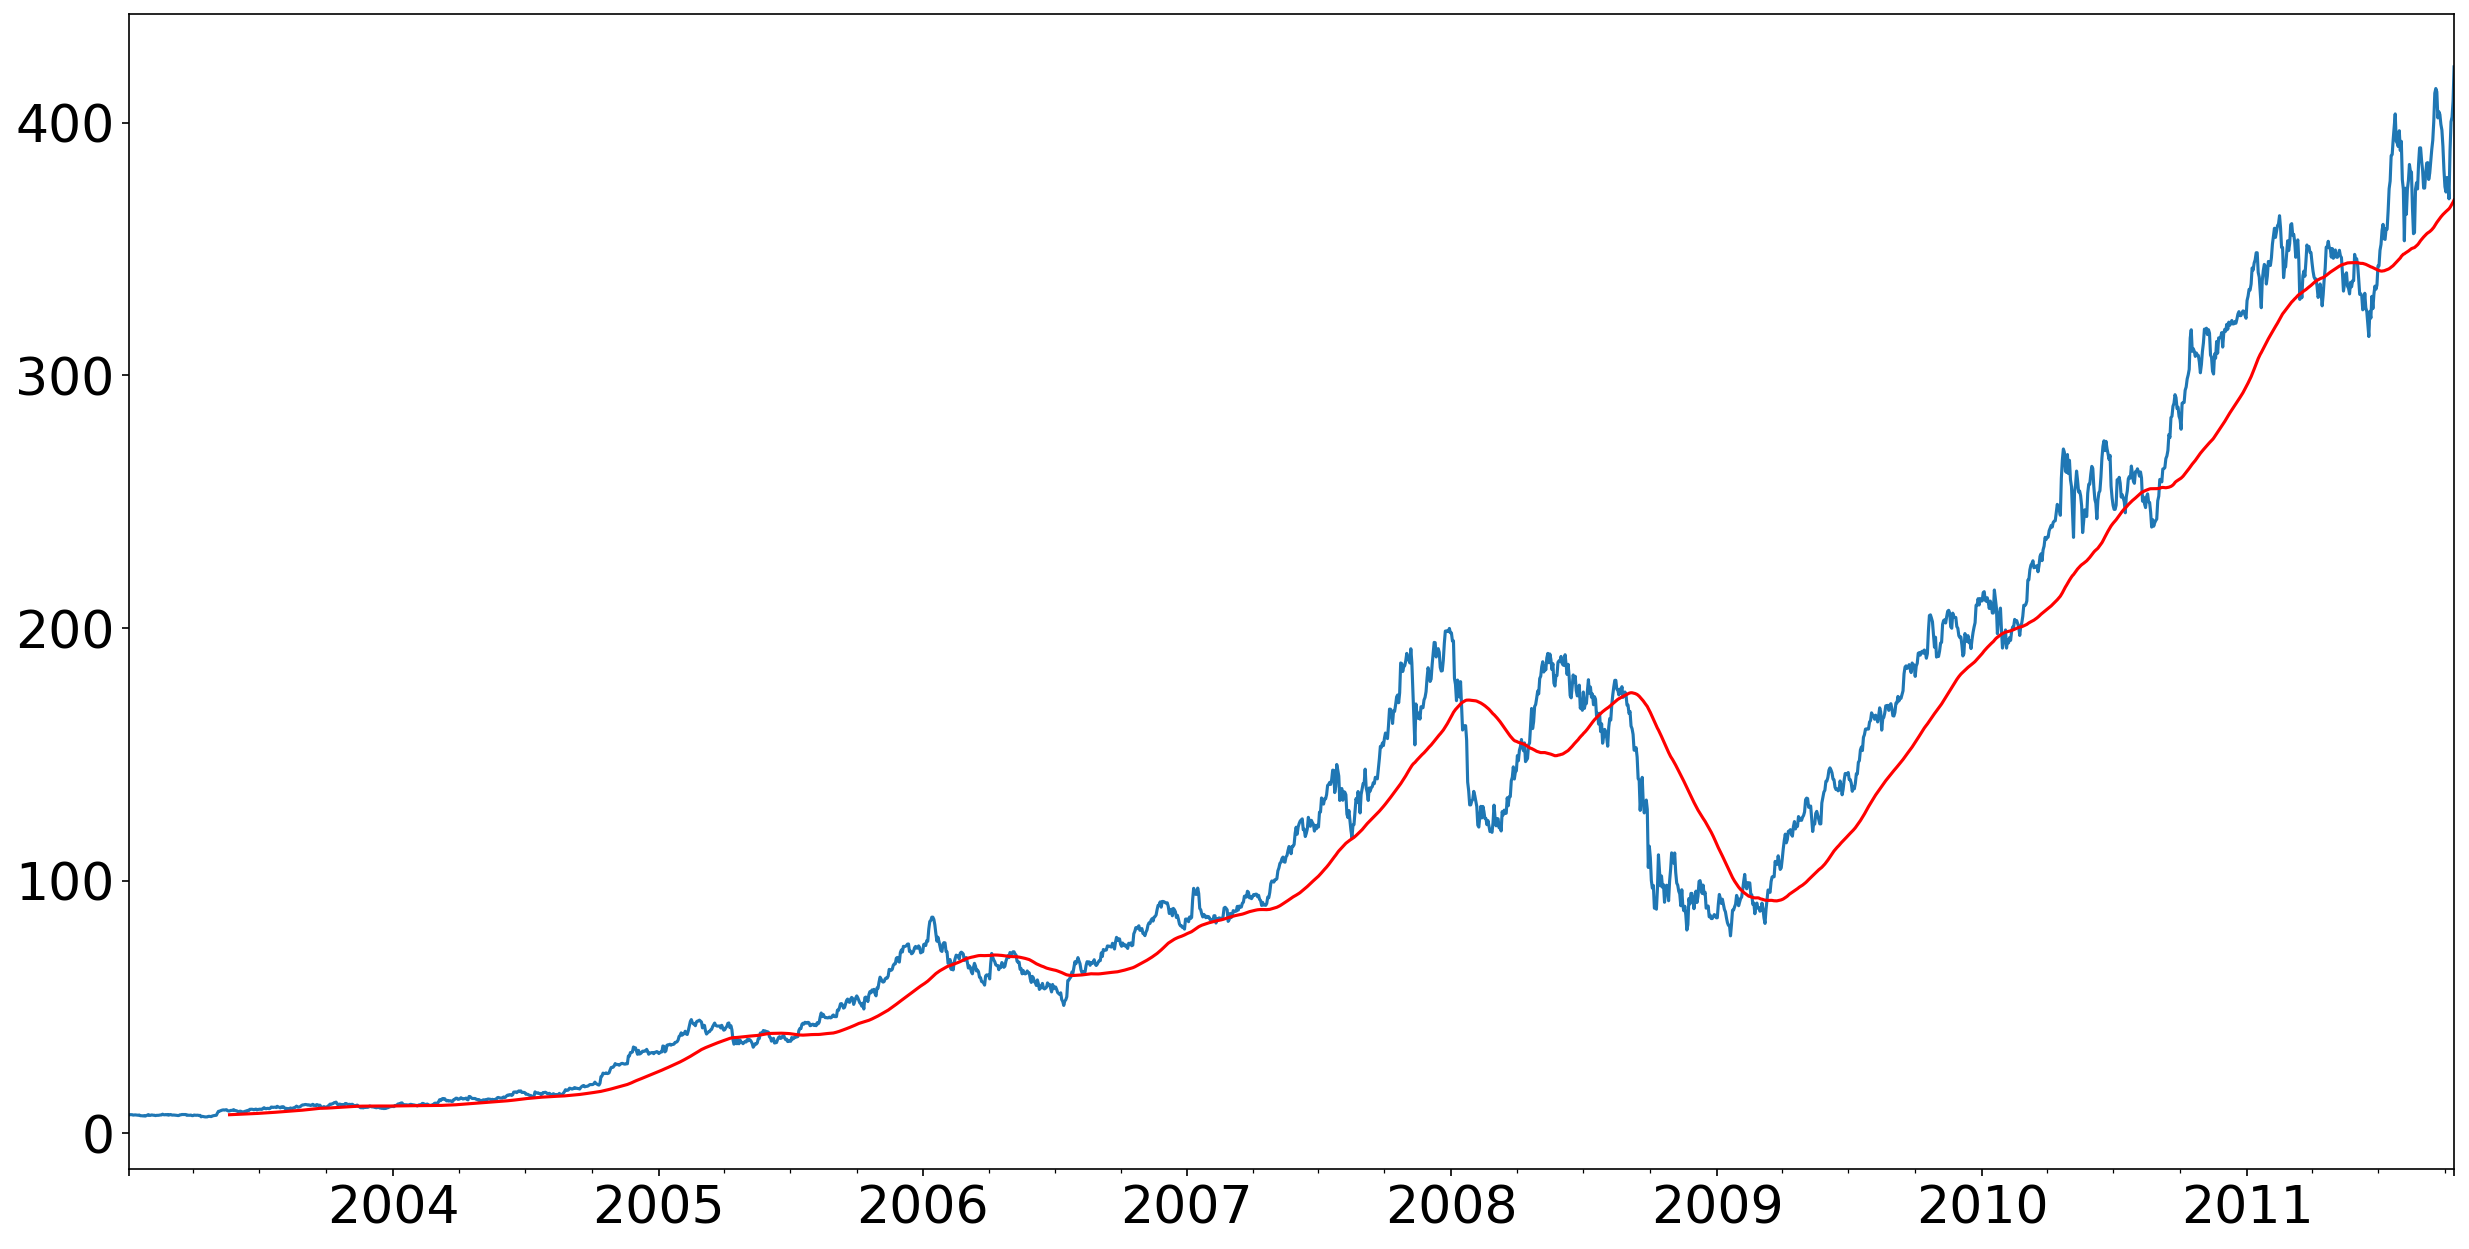

In [35]:
plt.figure(figsize = (20,10), dpi = 150)
close['AAPL'].plot()
close['AAPL'].rolling(100).mean().plot(color='red')
plt.tick_params(labelsize=25)

La expresión *rolling(200)* crea un objeto que permite agrupar sobre una ventana deslizante de 200 días. Así, aquí tenemos el promedio de ventana móvil de los precios de cierre de Apple.

Desviación estándar de la rentabilidad diaria en 200 días

In [36]:
std200 = close['AAPL'].pct_change().rolling(200,min_periods=10).std()

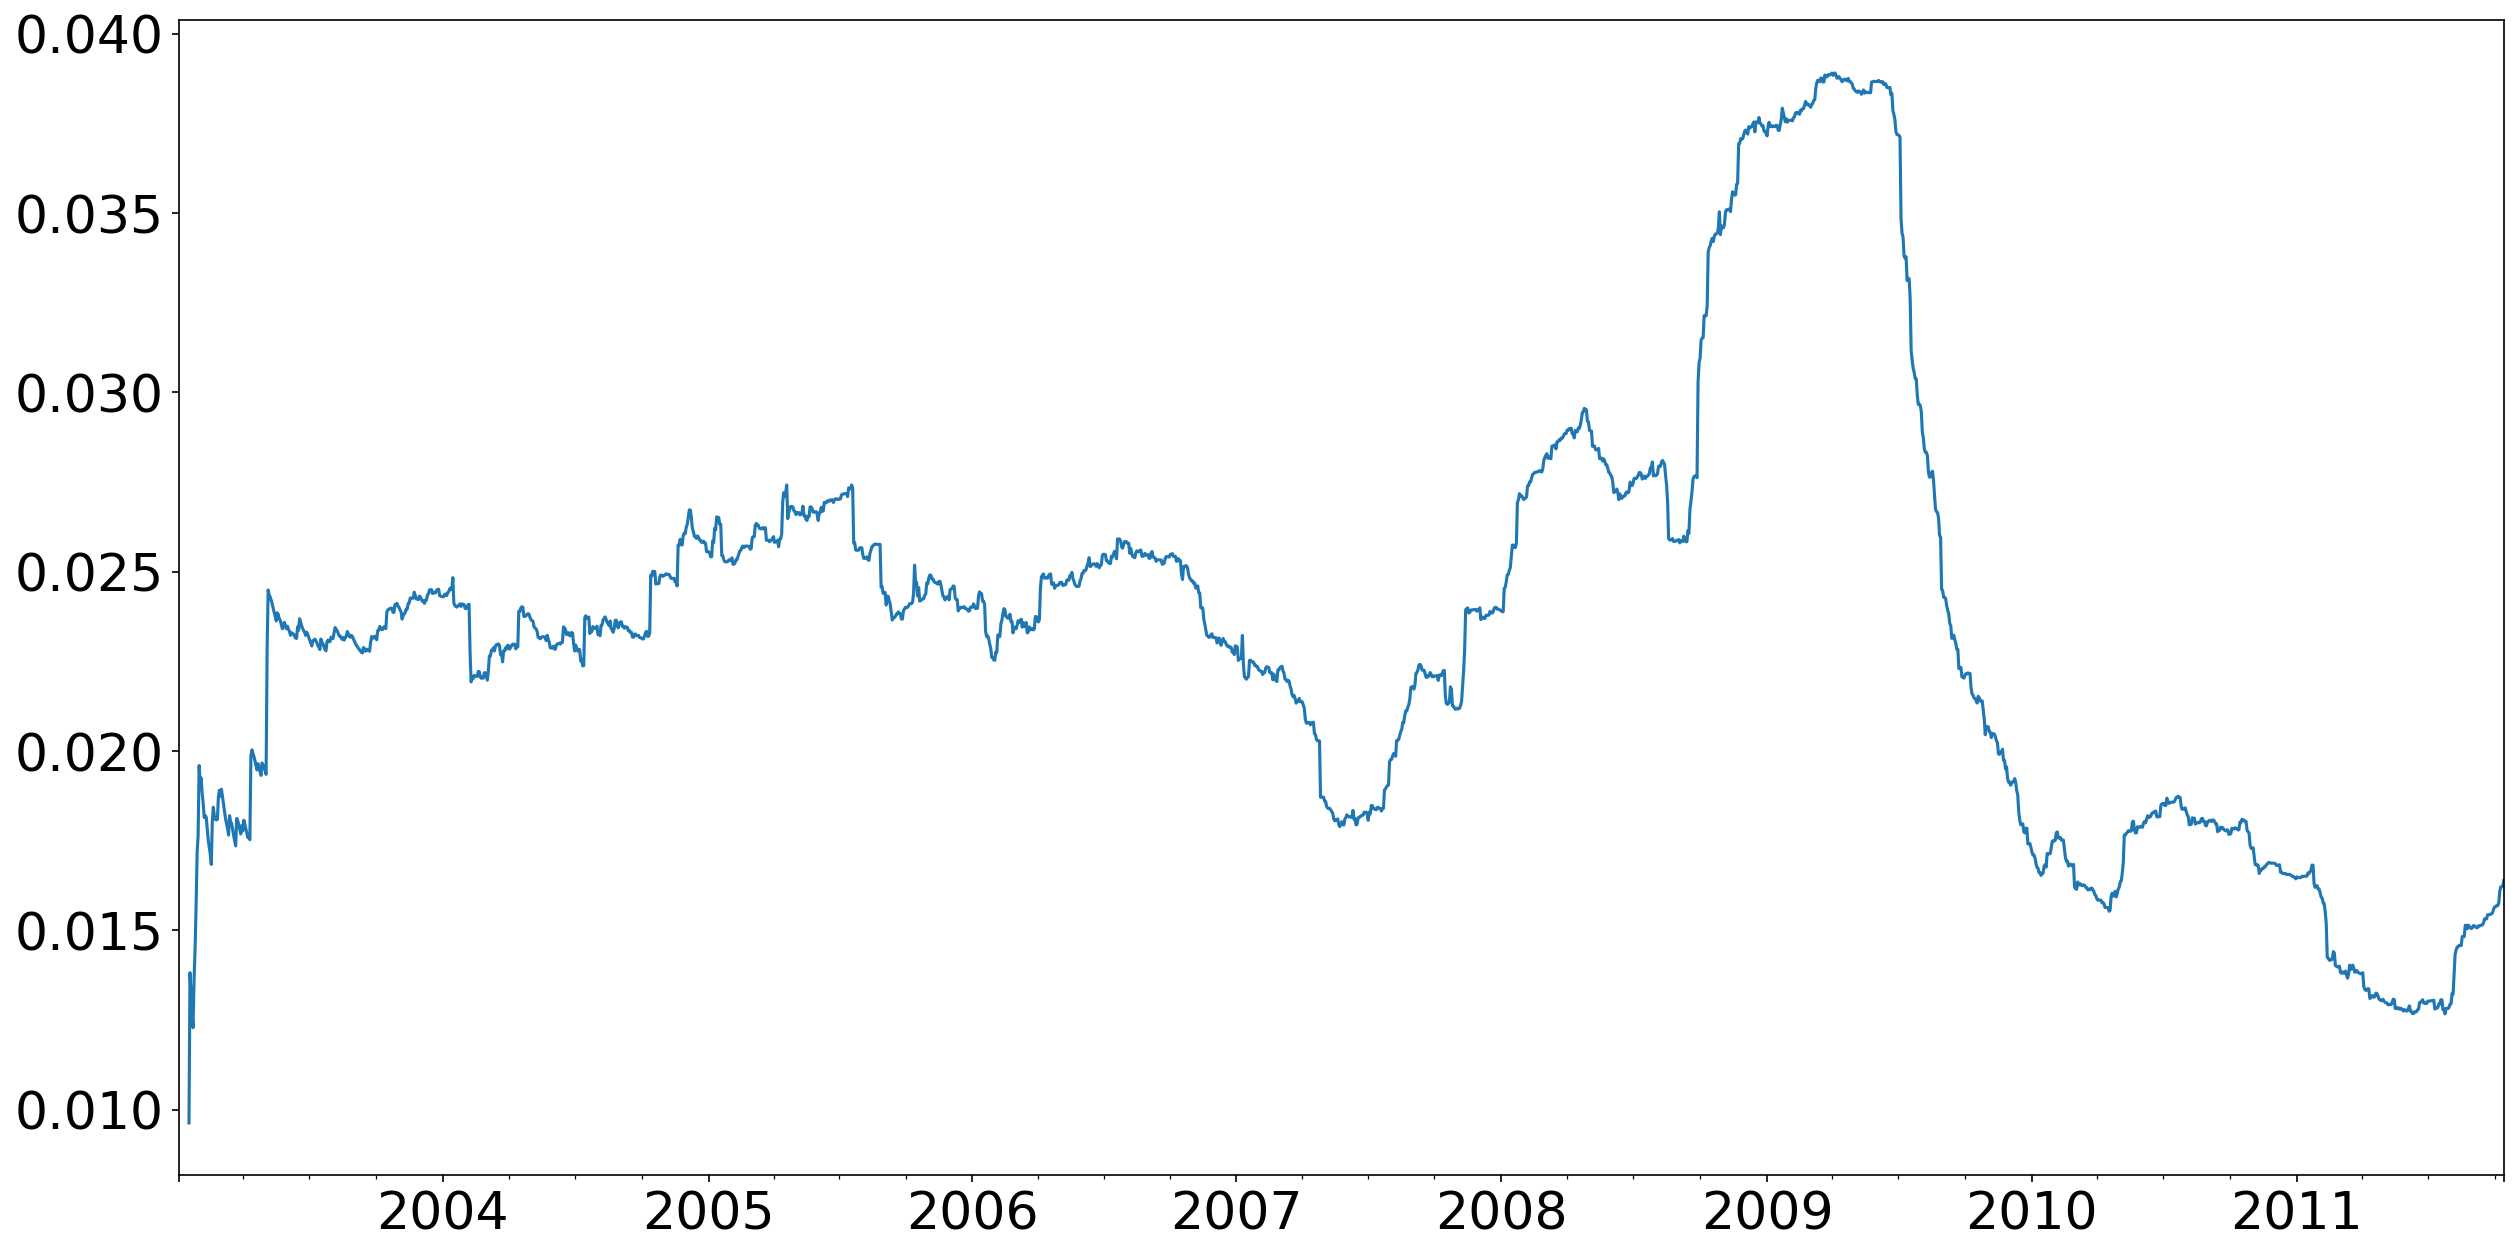

In [37]:
plt.figure(figsize=(20,10), dpi=150)
std200.plot()
plt.tick_params(labelsize=25)

Llamar a una función de ventana en movimiento en un dataframe aplica la transformación a cada columna

<Axes: >

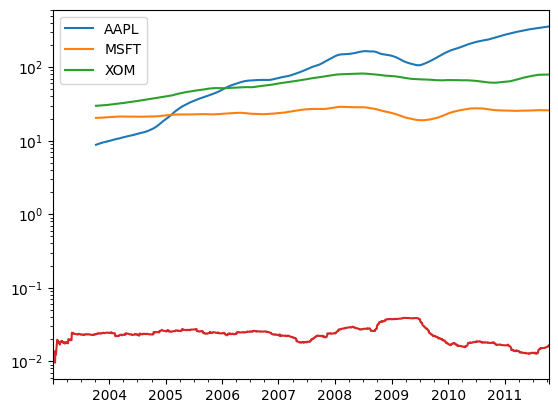

In [39]:
close.rolling(200).mean().plot(logy = True)

std200.plot()

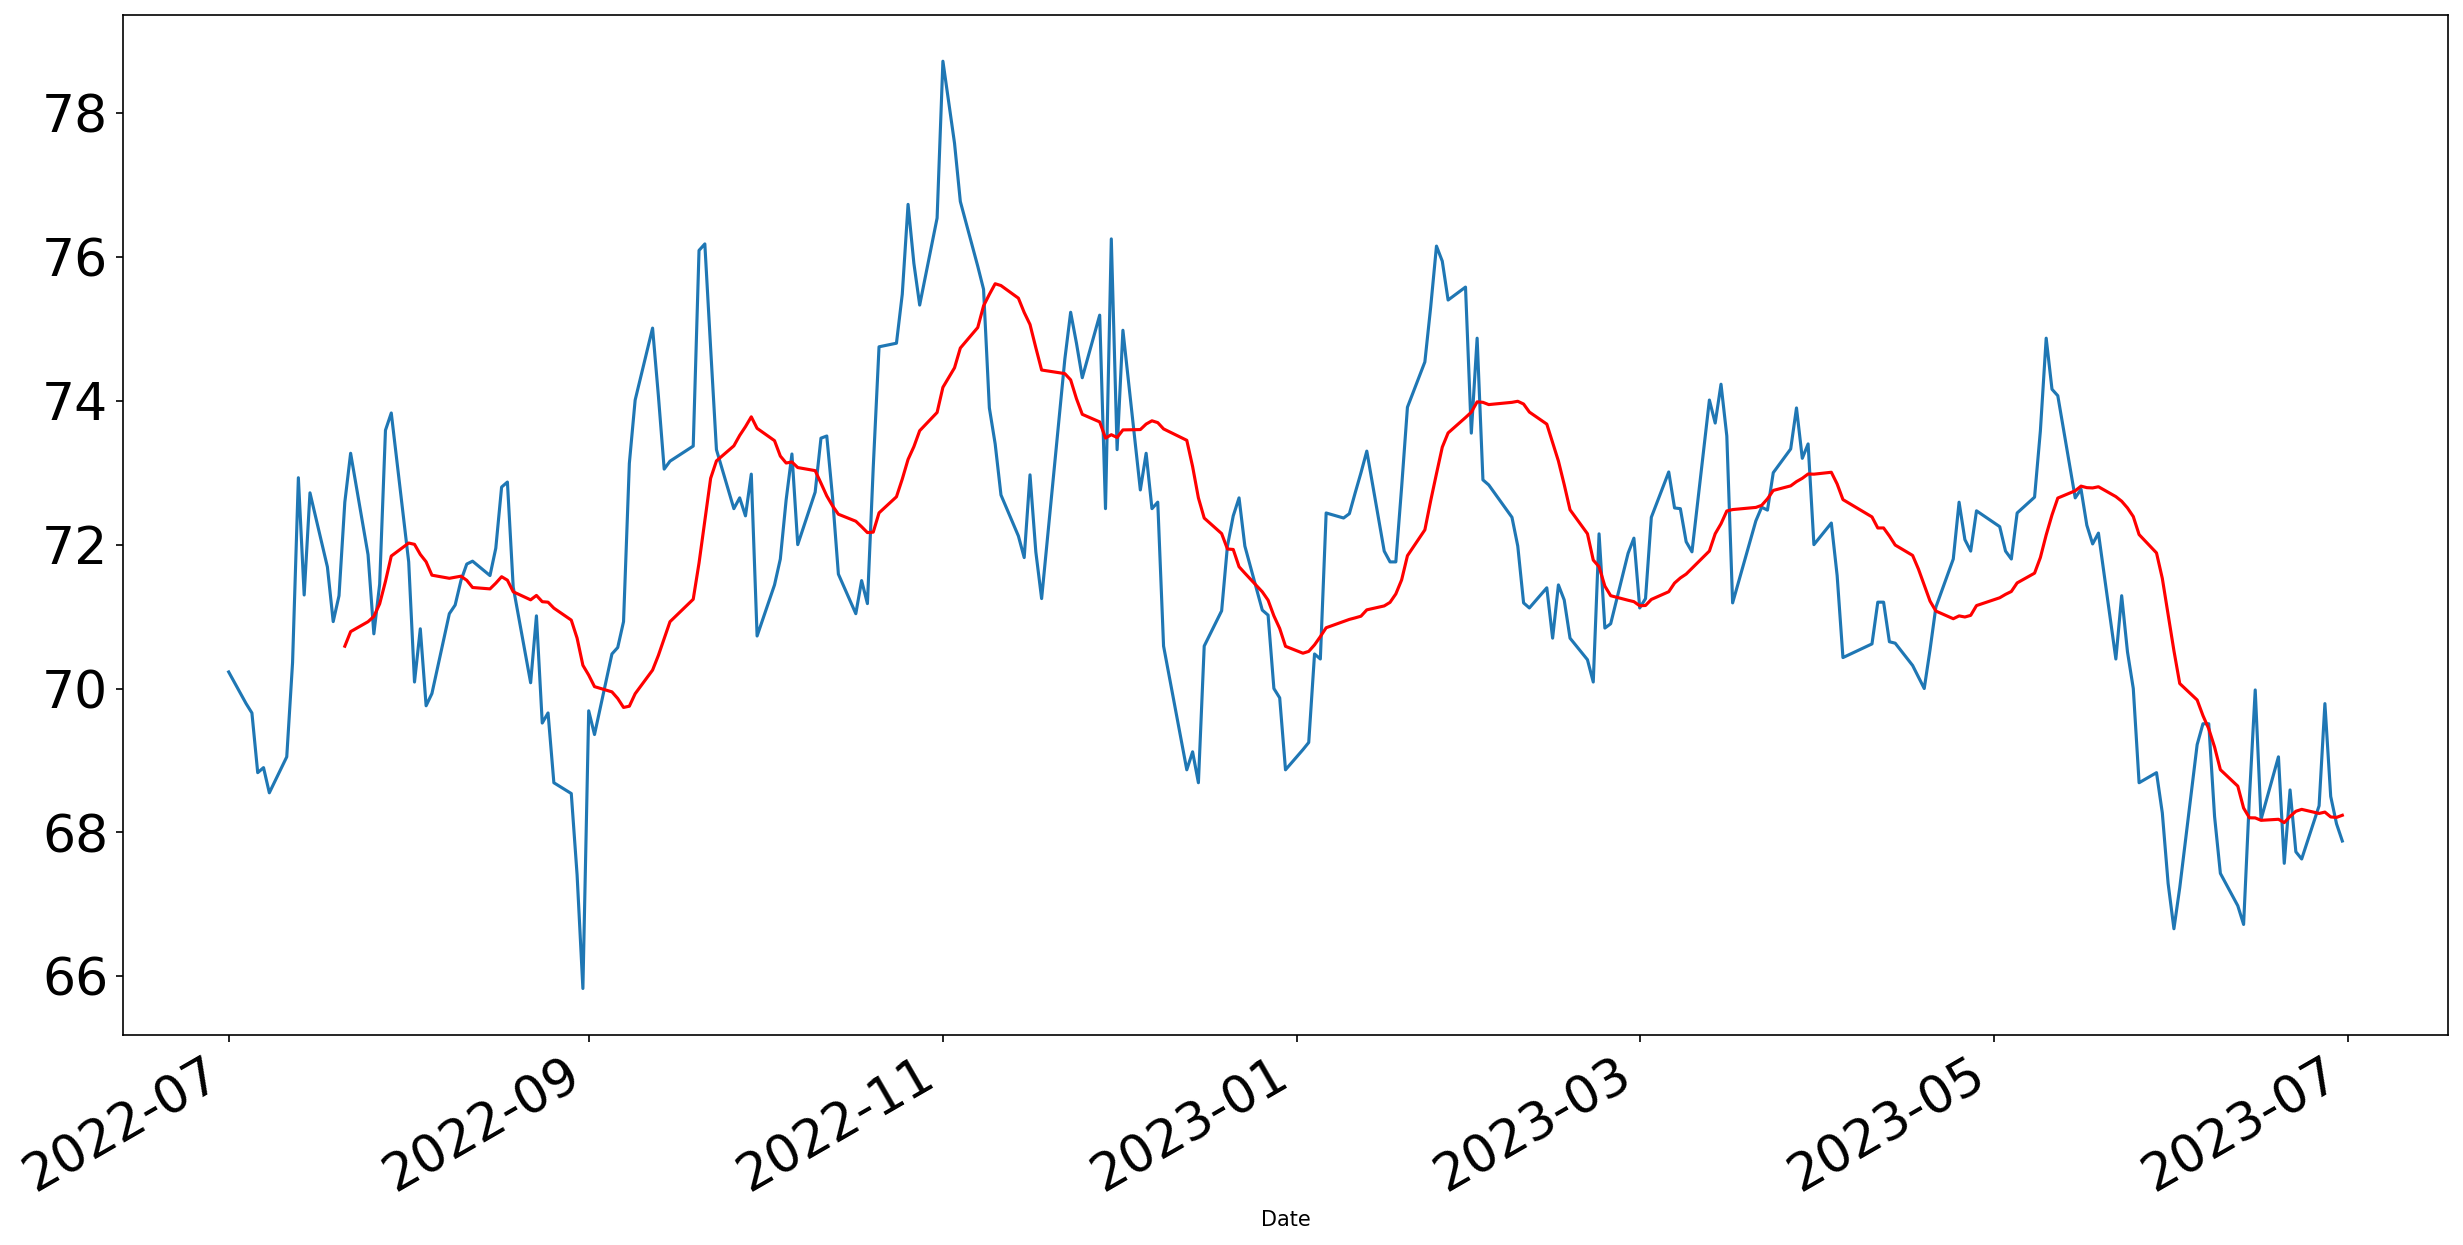

In [42]:
plt.figure(figsize=(20,10), dpi=150)
precio_c['Close'].plot()
precio_c['Close'].rolling(15).mean().plot(color = 'red')
plt.tick_params(labelsize=25)

Una serie es **estacionaria** cuando es estable a lo largo del tiempo, es decir, cuando la media y varianza son constantes en el tiempo.

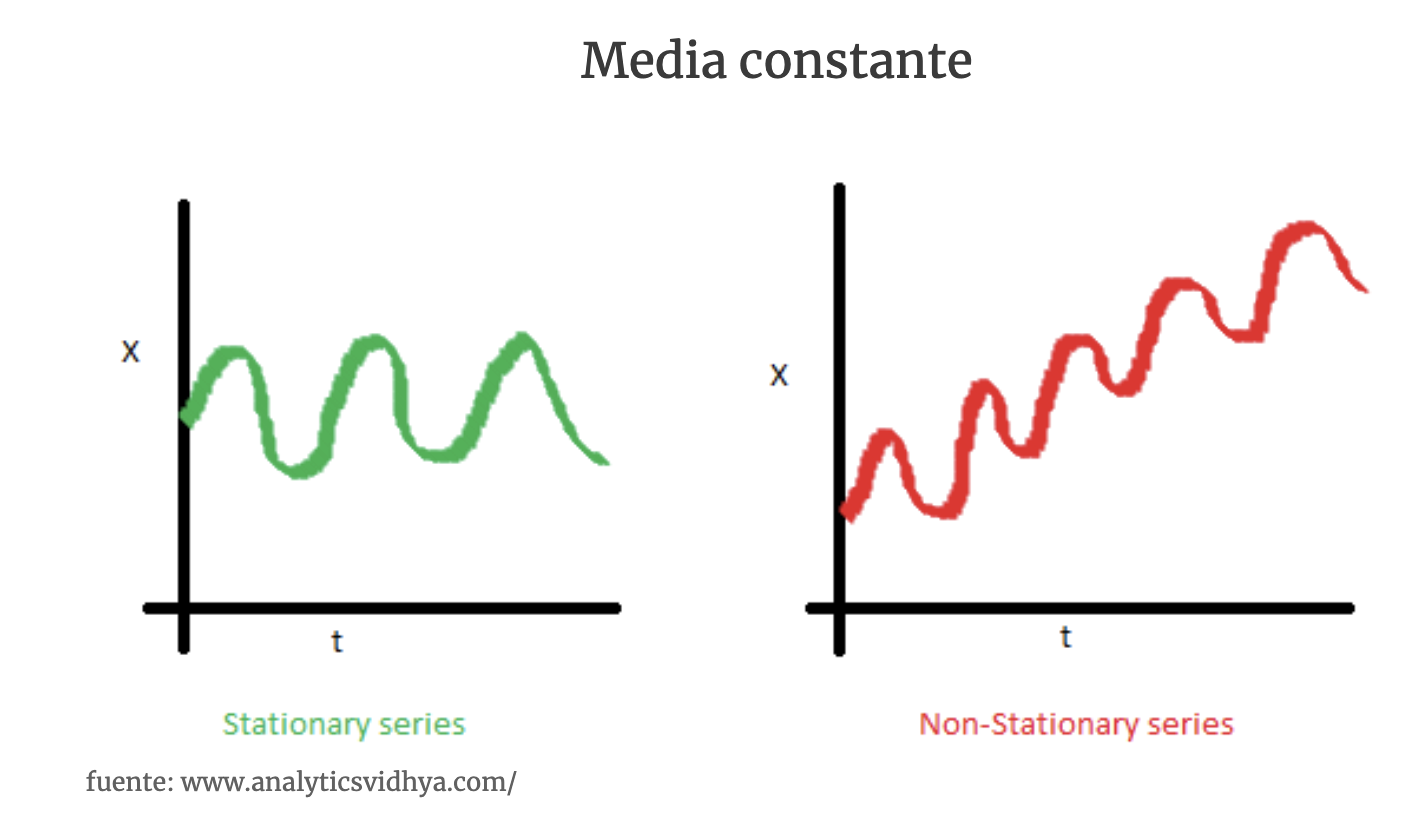

La serie de la izquierda tiene una media constante, en cambio la figura de la derecha muestra tendencia, y su media se incrementa con el paso del tiempo.

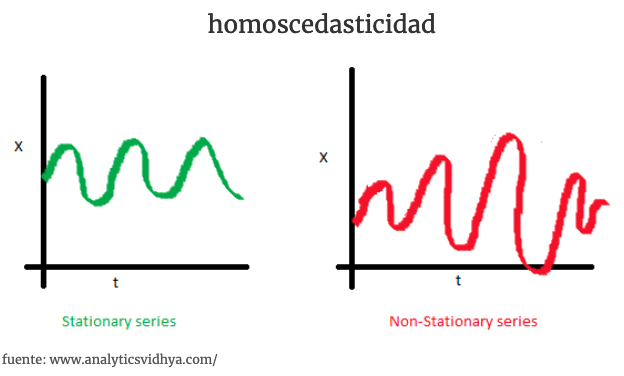

La serie de la derecha no es estacionaria, su varianza se incrementa.

## Prueba de Dickey-Fuller aumentada

El test estadístico de referencia utilizado para conocer si una serie es o no estacionaria es la prueba de Dickey Fuller aumentada (ADF). Para esta prueba se establecen las dos hipótesis:

* Hipótesis nula (H0): Los datos son no estacionarios.

* Hipótesis alternativa (H1): Los datos son estacionarios.

El test devuelve un número decimal. Cuanto más negativo es este valor, mayor es la probabilidad de rechazar la hipótesis nula. Lo cual implica aceptar que nos encontramos ante una serie estacionaria con un cierto grado de probabilidad.

El estadístico de la prueba proporciona una forma de evaluar la hipótesis nula. Las estadísticas de prueba que son menores o iguales al valor crítico proporcionan evidencia contra la hipótesis nula.
El p-valor es una probabilidad que mide la evidencia en contra de la hipótesis nula. Las probabilidades inferiores proporcionan mayor evidencia en contra de la hipótesis nula. Para determinar si se deben diferenciar los datos, compare el estadístico de prueba con el valor crítico o el p-valor con su nivel de significación. Debido a que el valor p contiene más aproximación, la recomendación del análisis utiliza el valor crítico para evaluar la hipótesis nula cuando el nivel de significancia es 0,01, 0,05 o 0,10. Por lo general, la conclusión es la misma para el valor crítico y el p-valor.
Si el p-valor es menor o igual que el nivel de significancia o si el estadístico de prueba es menor o igual que el valor crítico, la decisión es rechazar la hipótesis nula. Debido a que los datos proporcionan evidencia de que los datos son estacionarios.
Si el p-valor es mayor que el nivel de significancia o si el estadístico de prueba es mayor que el valor crítico, la decisión es no rechazar la hipótesis nula. Debido a que los datos no proporcionan evidencia de que los datos sean estacionarios.

In [43]:
from statsmodels.tsa.stattools import adfuller

def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used',
                                             'Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [44]:
Augmented_Dickey_Fuller_Test_func(precio_c['Close'],"Close")

Resultados de la prueba de Dickey-Fuller para columna: Close
Test Statistic           -3.787454
p-value                   0.003038
No Lags Used              2.000000
Observations Used       249.000000
Critical Value (1%)      -3.456888
Critical Value (5%)      -2.873219
Critical Value (10%)     -2.572994
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


In [85]:
aem = pd.read_csv('https://raw.githubusercontent.com/jamc88/TSMCI-Analisis-de-datos-con-Python/main/Datos/AEROMEX_MX.csv',
                usecols=['Date','Close'],
                index_col=0, parse_dates=True)

In [86]:
aem

,Close
Date,
2019-01-02,22.530001
2019-01-03,22.770000
2019-01-04,23.160000
2019-01-07,23.270000
2019-01-08,23.230000
...,...
2022-03-11,0.951000
2022-03-14,0.800000
2022-03-15,0.586000


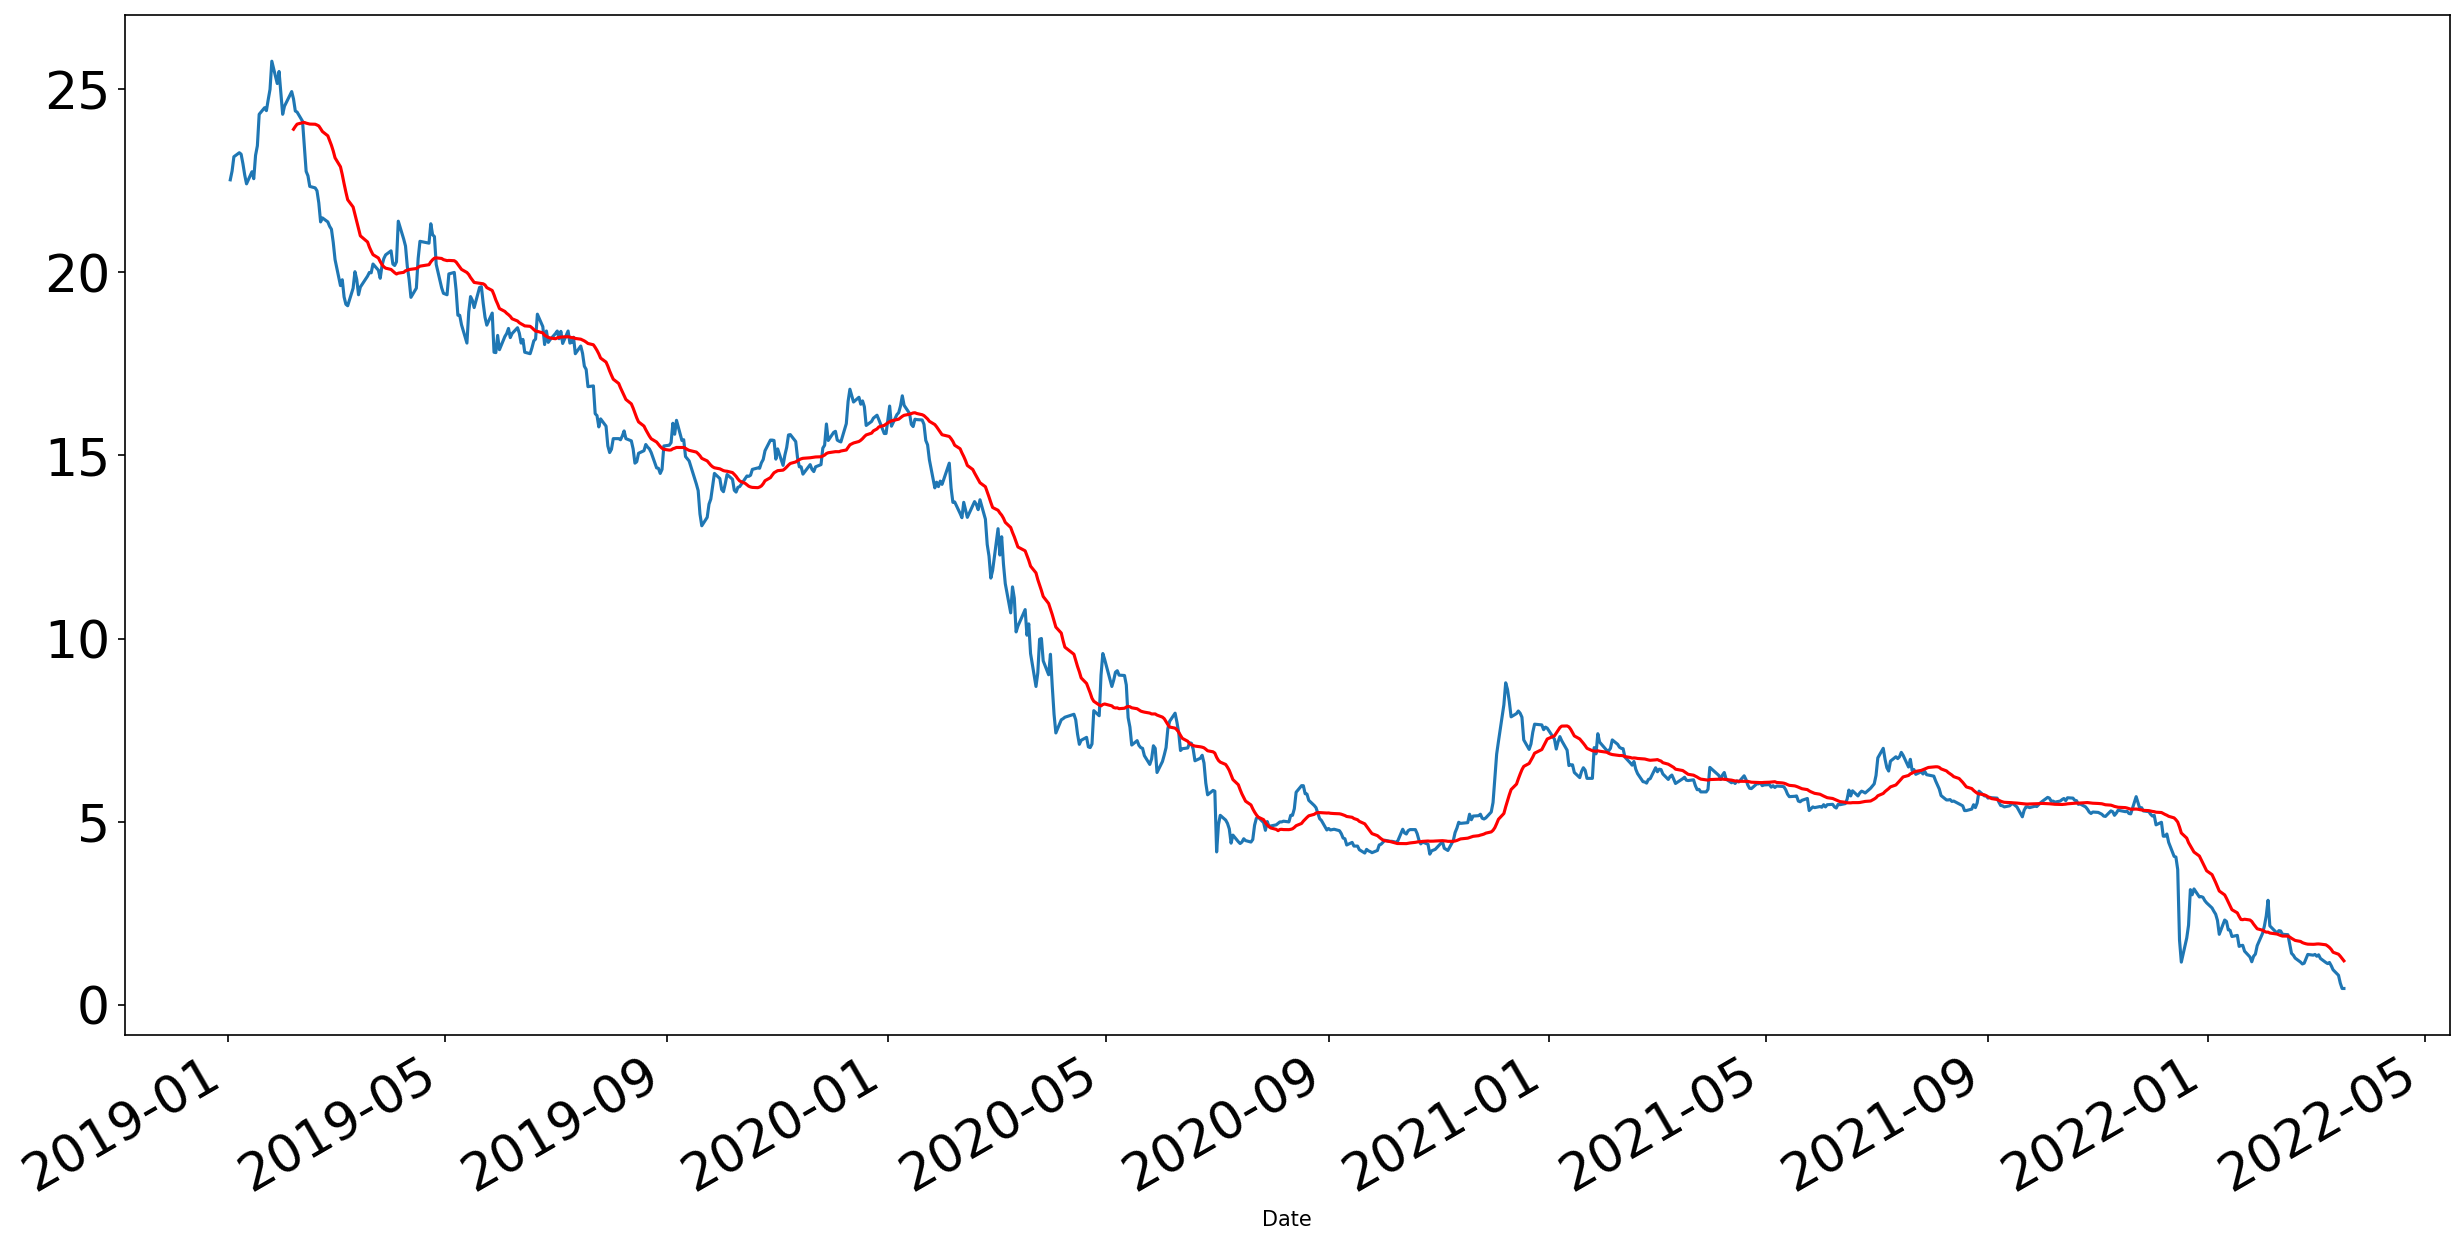

In [88]:
plt.figure(figsize=(20,10), dpi=150)
aem['Close'].plot()
aem['Close'].rolling(25).mean().plot(color='red')
plt.tick_params(labelsize=25)

In [89]:
Augmented_Dickey_Fuller_Test_func(aem['Close'],"Close")

Resultados de la prueba de Dickey-Fuller para columna: Close
Test Statistic           -1.419677
p-value                   0.572807
No Lags Used              1.000000
Observations Used       807.000000
Critical Value (1%)      -3.438479
Critical Value (5%)      -2.865128
Critical Value (10%)     -2.568681
dtype: float64
Conclusion:====>
No se puede rechazar la hipótesis nula
Los datos no son estacionarios
